In [1]:
import pandas as pd
from openbb import obb

obb.user.preferences.output_type = "dataframe"
data = obb.derivatives.futures.curve(symbol="VX")
print(data)

Extensions to add: alpha_vantage@1.3.3, biztoc@1.3.3, cboe@1.3.3, ecb@1.3.3, econometrics@1.4.3, finra@1.3.3, finviz@1.2.3, government_us@1.3.3, multpl@1.0.3, nasdaq@1.3.3, openbb_charting@2.2.3, quantitative@1.3.3, seeking_alpha@1.3.3, stockgrid@1.3.3, technical@1.3.3, tmx@1.2.3, tradier@1.2.3, wsj@1.3.3

Building...
  expiration  price
0    2024-10  20.95
1    2024-11  19.40
2    2024-12  19.00
3    2025-01  19.35
4    2025-02  19.40
5    2025-03  19.45
6    2025-04  19.40
7    2025-05  19.40
8    2025-06  19.55


<Axes: xlabel='expiration'>

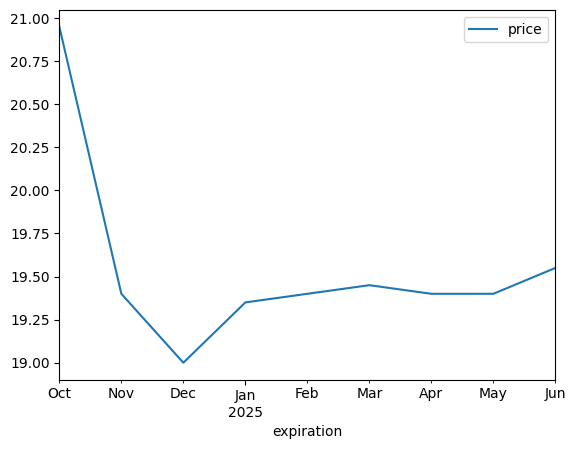

In [2]:
data.index = pd.to_datetime(data.expiration)
data.plot()

In [9]:
expirations = [
    "2024-12",
    "2025-12",
    "2026-12",
    "2027-12",
    "2028-12",
    "2029-12",
    "2030-12",
]

contracts = []
for expiration in expirations:
    df = (
        obb
        .derivatives
        .futures
        .historical(
            symbol="CL",
            expiration=expiration,
            start_date="2020-01-01",
            end_date="2022-12-31")).rename(columns={"close": expiration})
    
    contracts.append(df[expiration])


In [12]:
historical = (
    pd
    .DataFrame(contracts)
    .transpose()
    .dropna()
)

print(historical)

              2024-12    2025-12    2026-12    2027-12    2028-12    2029-12  \
date                                                                           
2020-01-02  52.099998  52.750000  53.130001  53.180000  53.180000  53.180000   
2020-01-03  51.669998  52.419998  52.910000  52.959999  52.959999  52.959999   
2020-01-06  51.630001  52.349998  52.840000  52.889999  52.889999  52.889999   
2020-01-07  51.939999  52.669998  53.169998  53.240002  53.240002  53.240002   
2020-01-08  51.540001  52.270000  52.770000  52.840000  52.840000  52.840000   
...               ...        ...        ...        ...        ...        ...   
2022-12-23  71.570000  67.779999  64.669998  62.119999  59.990002  58.139999   
2022-12-27  71.680000  67.860001  64.730003  62.180000  60.049999  58.200001   
2022-12-28  71.820000  68.290001  65.339996  62.790001  60.650002  58.790001   
2022-12-29  70.980003  67.500000  64.599998  62.119999  59.980000  58.119999   
2022-12-30  72.309998  68.629997  65.620

<Axes: >

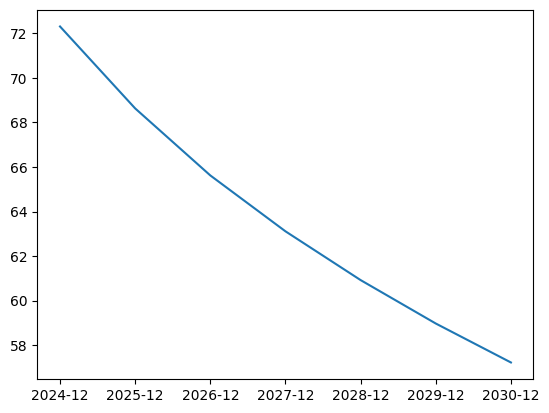

In [13]:
historical.iloc[-1].plot()